# Face Recognition
---

**Project description** <br>
Design a face recognition system using the eigenface method you have learned in
class. You will be given a set of M training images and another set of test images. Use the training
images to produce a set of eigenfaces. Then recognize the face in the input image using the eigenface
method. Use Euclidean distance as distance measure for computing $d_i$ , for i = 0 to M. You can
manually choose the thresholds $T_0$ and $T_1$ that produce the best results.

What to hand in:
+ An **MS Words file** that contains your **source code** (with full comments and documentation), the **language and  compiler** used, **instructions on how to compile and run** your program, and the following: 
    - The manually chosen thresholds $T_0$ and $T_1$ , the mean face m, and the M eigenfaces. The eigenfaces are contained in the matrix U, with each column represents an eigenface. You can output each eigenface as an N $\times$ N image.
    - The PCA coefficients ($Ω_i$) for each training image. 
    - For each test image: the image after subtracting the mean face I, its PCA coefficients ($Ω_i$), the reconstructed face image ($I_R$), distances $d_i$ for i = 0 to M, and classification result (non-face, unknown face, or identify of face.)

+ **Your executable code**, the original **output image** files as described in (a) above as individual files.

<hr>
**Dataset Description:**<br>
- It consists of a set of 17 grayscale face images (in JPG format). Each image is of dimension 195 x 231 (width x height) pixels and each pixel uses 8 bits for grayscale. 
- Use the following 8 images as training images: subject01.normal, subject02.normal, subject03.normal, subject07.normal, subject10.normal, subject11.normal, subject14.normal and subject15.normal. Use all 17 images (including the 8 training images) in the dataset as test images. 
- Non-face image: A non-face image (apple1) in JPG format is attached. This image is also of dimension 195 x 231. In addition to the 17 face images,  test your algorithm on this non-face image. 

Note: In the lecture slides, the training and test images are of size N X N (same horizontal and vertical dimensions.) The face images in the above dataset have different horizontal and vertical dimensions, but the Eigenface method works the same way and with no changes to the formulas. 

In [213]:
# # Metadata
# %load_ext watermark
# %watermark -a "Vutsal Singhal"
# %watermark -u -n -t -z
# %watermark -p numpy,matplotlib
# %watermark

In [214]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from PIL import Image

## Read Images

In [215]:
dataset_path = 'Dataset/'
dataset_dir  = sorted(os.listdir(dataset_path))

width  = 195
height = 231

In [216]:
additional = ['subject16.normal.jpg','subject17.normal.jpg','subject18.normal.jpg','subject19.normal.jpg']

for i in range(len(additional)):
    img = Image.open(dataset_path + additional[i]).convert('L') # 轉成灰階
    img_resized = img.resize((195, 231)) # resize
    img_resized.save(dataset_path + additional[i]) # 儲存覆蓋原檔



In [217]:
# additional = ['test_ownface1.jpg','test_ownface2.jpg']

# for i in range(len(additional)):
#     img = Image.open(dataset_path + additional[i]).convert('L') # 轉成灰階
#     img_resized = img.resize((195, 231)) # resize
#     img_resized.save(dataset_path + additional[i]) # 儲存覆蓋原檔



In [218]:
# additional = ['test_friend1.jpg','test_friend2.jpg']

# for i in range(len(additional)):
#     img = Image.open(dataset_path + additional[i]).convert('L') # 轉成灰階
#     img_resized = img.resize((195, 231)) # resize
#     img_resized.save(dataset_path + additional[i]) # 儲存覆蓋原檔



Train Images:
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)
(231, 195)


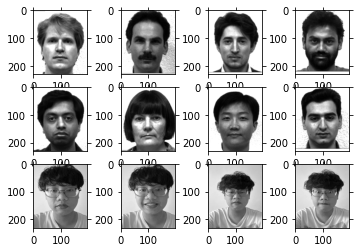

Test Images:


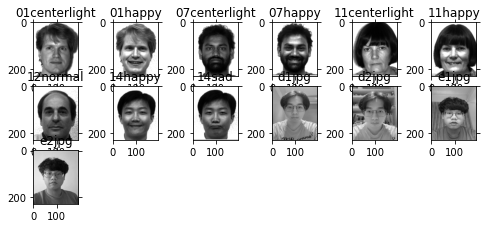

In [219]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg','subject16.normal.jpg','subject17.normal.jpg','subject18.normal.jpg','subject19.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    print(img.shape)
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
# test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
test_image_names = [name for name in dataset_dir if name not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(5,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Mean face

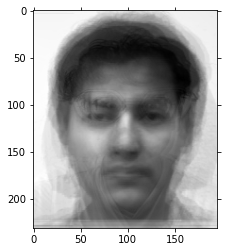

In [220]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalised faces

In [221]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))
print(normalised_training_tensor.shape[1])
for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

45045


### Display normalised faces

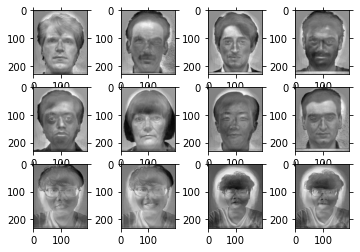

In [222]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(3,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance matrix

In [223]:
print(normalised_training_tensor.shape)
cov_matrix = np.cov(normalised_training_tensor)
print(cov_matrix.shape)



(12, 45045)
(12, 12)


In [224]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)
print(eigenvectors.shape)

Eigenvectors of Cov(X): 
[[-0.08746703 -0.30197424 -0.13054    -0.17725566  0.28867513  0.39179038
   0.46603366  0.1681672  -0.18270959  0.57423572 -0.08134494  0.02556835]
 [-0.27518135  0.13993509  0.25059514  0.06693071  0.28867513  0.64022352
  -0.15023612  0.29810985  0.35016971 -0.30886005  0.12050933 -0.01483324]
 [-0.24362443  0.04681938 -0.10420827  0.03609803  0.28867513 -0.51722052
   0.55972133  0.24804957  0.39020661 -0.21200542  0.04459225 -0.03781169]
 [-0.27334206  0.31339037 -0.08727606  0.37265071  0.28867513 -0.25032213
  -0.44678004  0.24576434 -0.0401179   0.50389599 -0.13541554 -0.02683147]
 [-0.2743902  -0.20816182 -0.24546577 -0.33770734  0.28867513 -0.02801261
  -0.27633946 -0.61121222  0.40469792  0.0958142   0.00744163 -0.00096099]
 [ 0.15904614 -0.65842427  0.5705506   0.25998901  0.28867513 -0.20715005
  -0.14021061  0.00225947  0.02048227 -0.00091384 -0.03832841 -0.01617121]
 [-0.17375475 -0.25876102 -0.37103189 -0.22662389  0.28867513 -0.08846301
  -0.25

In [225]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]


## Find cumulative variance of each principle component

Cumulative proportion of variance explained vector: 
[0.34646916 0.57135476 0.66906643 0.75694549 0.81578816 0.86338626
 0.90836082 0.94327096 0.96726634 0.98487458 1.         1.        ]


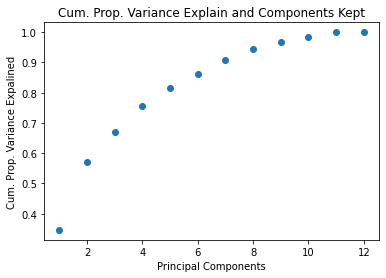

In [226]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the necessary no.of principle components:

In [227]:
reduced_data = np.array(eigvectors_sort[:12]).transpose()
print(reduced_data.shape)

(12, 12)


Now we try to find the projected data. This will form the eigen space.

In [228]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
print(proj_data.shape)

(12, 45045)


## Plot eigen faces

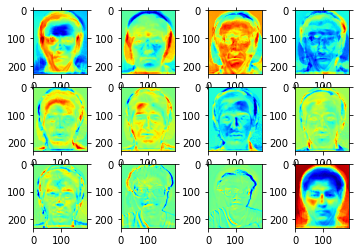

In [230]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(3,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding weights for each traning image

In [231]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-4.52692917e+07, -1.13629390e+08, -5.60214671e+07,
        -1.73587676e+07,  5.48323877e+07,  7.75481289e+07,
         1.26162994e+07, -2.43511788e+07,  3.31095253e+07,
         1.99923001e+06, -3.93891120e+04,  5.45352083e+08],
       [-1.70507797e+08,  5.29365591e+07,  5.68295918e+07,
         6.20777916e+06,  6.01524947e+07, -2.84770734e+07,
         2.37884663e+07,  2.68725189e+07, -1.66869142e+07,
         1.86178028e+06, -9.75639752e+04, -1.71308600e+08],
       [-1.45671873e+08,  2.01439808e+07, -2.80983319e+07,
         8.59724580e+06, -4.90119701e+07,  5.84899057e+07,
         1.93720205e+07,  1.98924051e+07, -6.20498867e+06,
         2.75007255e+06, -1.22166340e+06,  3.84769512e+08],
       [-1.68777813e+08,  1.21792073e+08, -3.69428123e+06,
         5.41109990e+07, -3.06576686e+07, -5.02419211e+07,
         1.96080685e+07,  1.95020236e+06,  1.82182214e+07,
        -5.69362282e+06, -4.71588972e+05,  1.23395207e+07],
       [-1.70222697e+08, -8.45257174e+07, -2.7365841

## Now we recognise unknown face!

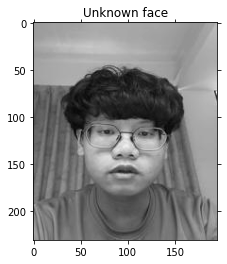

In [232]:
unknown_face        = plt.imread('Dataset/test_ownface1.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalise unknown face

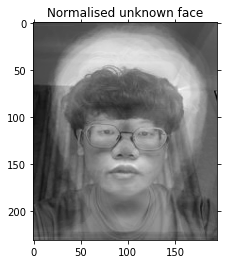

In [ ]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Wieghts of uknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [ ]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 5.51881468e+07, -3.24730245e+07, -1.83234100e+08,  7.54069240e+07,
        5.60233605e+07,  1.72426078e+08, -7.10383424e+06])

Finding the $min|W - W_{unknown}|$

In [233]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

ValueError: operands could not be broadcast together with shapes (12,12) (7,) 

In [258]:
def face_detector(img_name,img, mean_face, proj_data, threshold):
    img = np.asarray(img).flatten()
    # Subtract the mean face from the input image
    normalised_face = img - mean_face #shape (45045,)
    
    # Project the normalised face onto the eigenfaces to obtain the weight vector
    weight_vector = np.dot(proj_data, normalised_face) #shape(12,1)
    
    # Reconstruct the normalised face from the weight vector and mean face
    print(proj_data.shape)
    j = np.dot(weight_vector, proj_data)
    reconstructed_face = mean_face + j
    
    # Compute the reconstruction error
    error = np.linalg.norm(normalised_face - reconstructed_face)
    reconstructed_image = reconstructed_face.reshape((231, 195))
    from PIL import Image

    img = Image.fromarray(reconstructed_image)
    
    # img.show()

    print(error)
    # Check if the input image is a face based on the reconstruction error and threshold
    if error < threshold:
        return print("True")
    else:
        return print("False")


In [259]:
print('Test Images:')

for i in range(len(test_image_names)):
    img_test = Image.open(dataset_path+test_image_names[i])
    print(test_image_names[i])
    face_detector(test_image_names[i],img_test,mean_face,proj_data,121110975255661.23)


Test Images:
subject01.centerlight.jpg
(12, 45045)
25008649676491.266
True
subject01.happy.jpg
(12, 45045)
48611896750234.57
True
subject07.centerlight.jpg
(12, 45045)
14783921754872.018
True
subject07.happy.jpg
(12, 45045)
16863685356478.95
True
subject11.centerlight.jpg
(12, 45045)
121111027683285.08
False
subject11.happy.jpg
(12, 45045)
80862153972008.53
True
subject12.normal.jpg
(12, 45045)
22619639428250.1
True
subject14.happy.jpg
(12, 45045)
34042771979369.54
True
subject14.sad.jpg
(12, 45045)
20056354638299.13
True
test_friend1.jpg
(12, 45045)
63880544997890.11
True
test_friend2.jpg
(12, 45045)
93278144137970.4
True
test_ownface1.jpg
(12, 45045)
111882424374958.14
True
test_ownface2.jpg
(12, 45045)
45959426851124.63
True


## Reconizing all test images

(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)
(45045,)
(7, 45045)


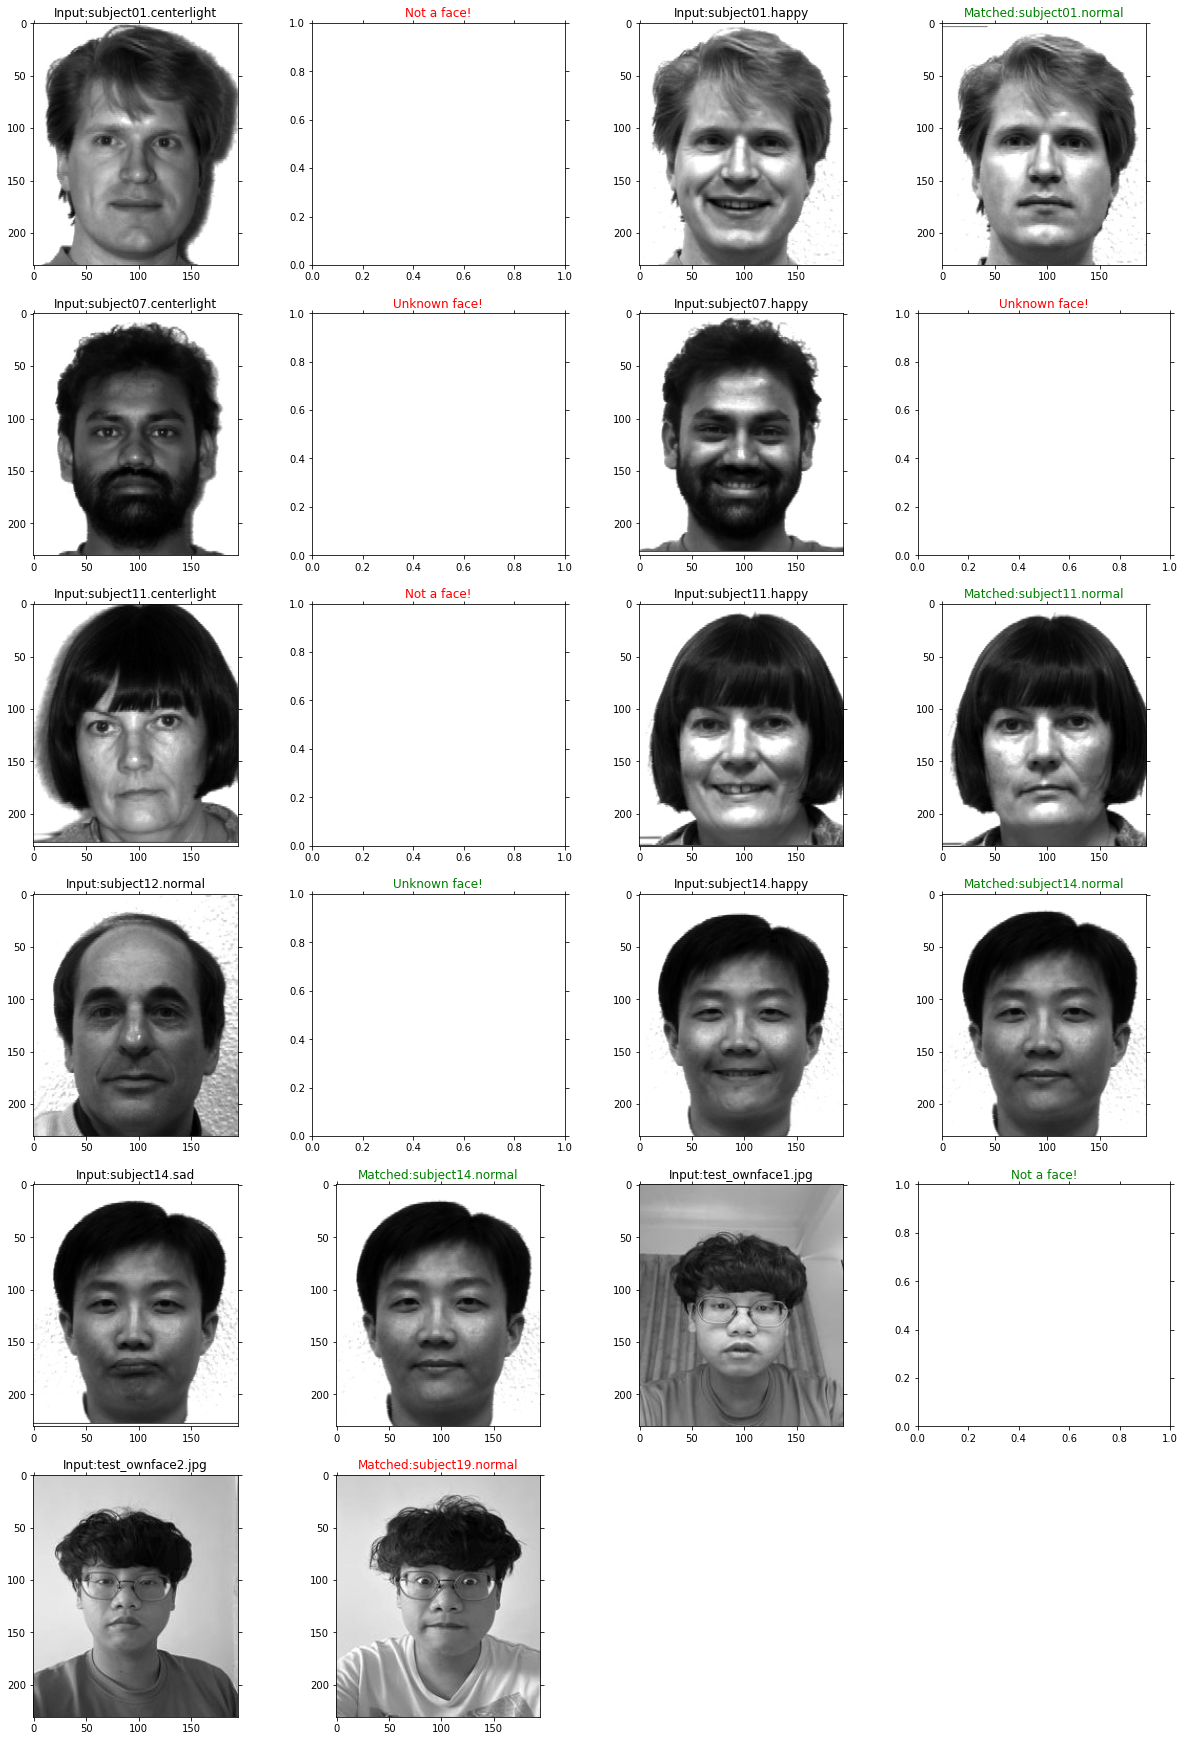

Correct predictions: 6/11 = 54.54545454545454%


In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('Dataset/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    print(normalised_uface_vector.shape)
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    print(proj_data.shape)
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Normalised images

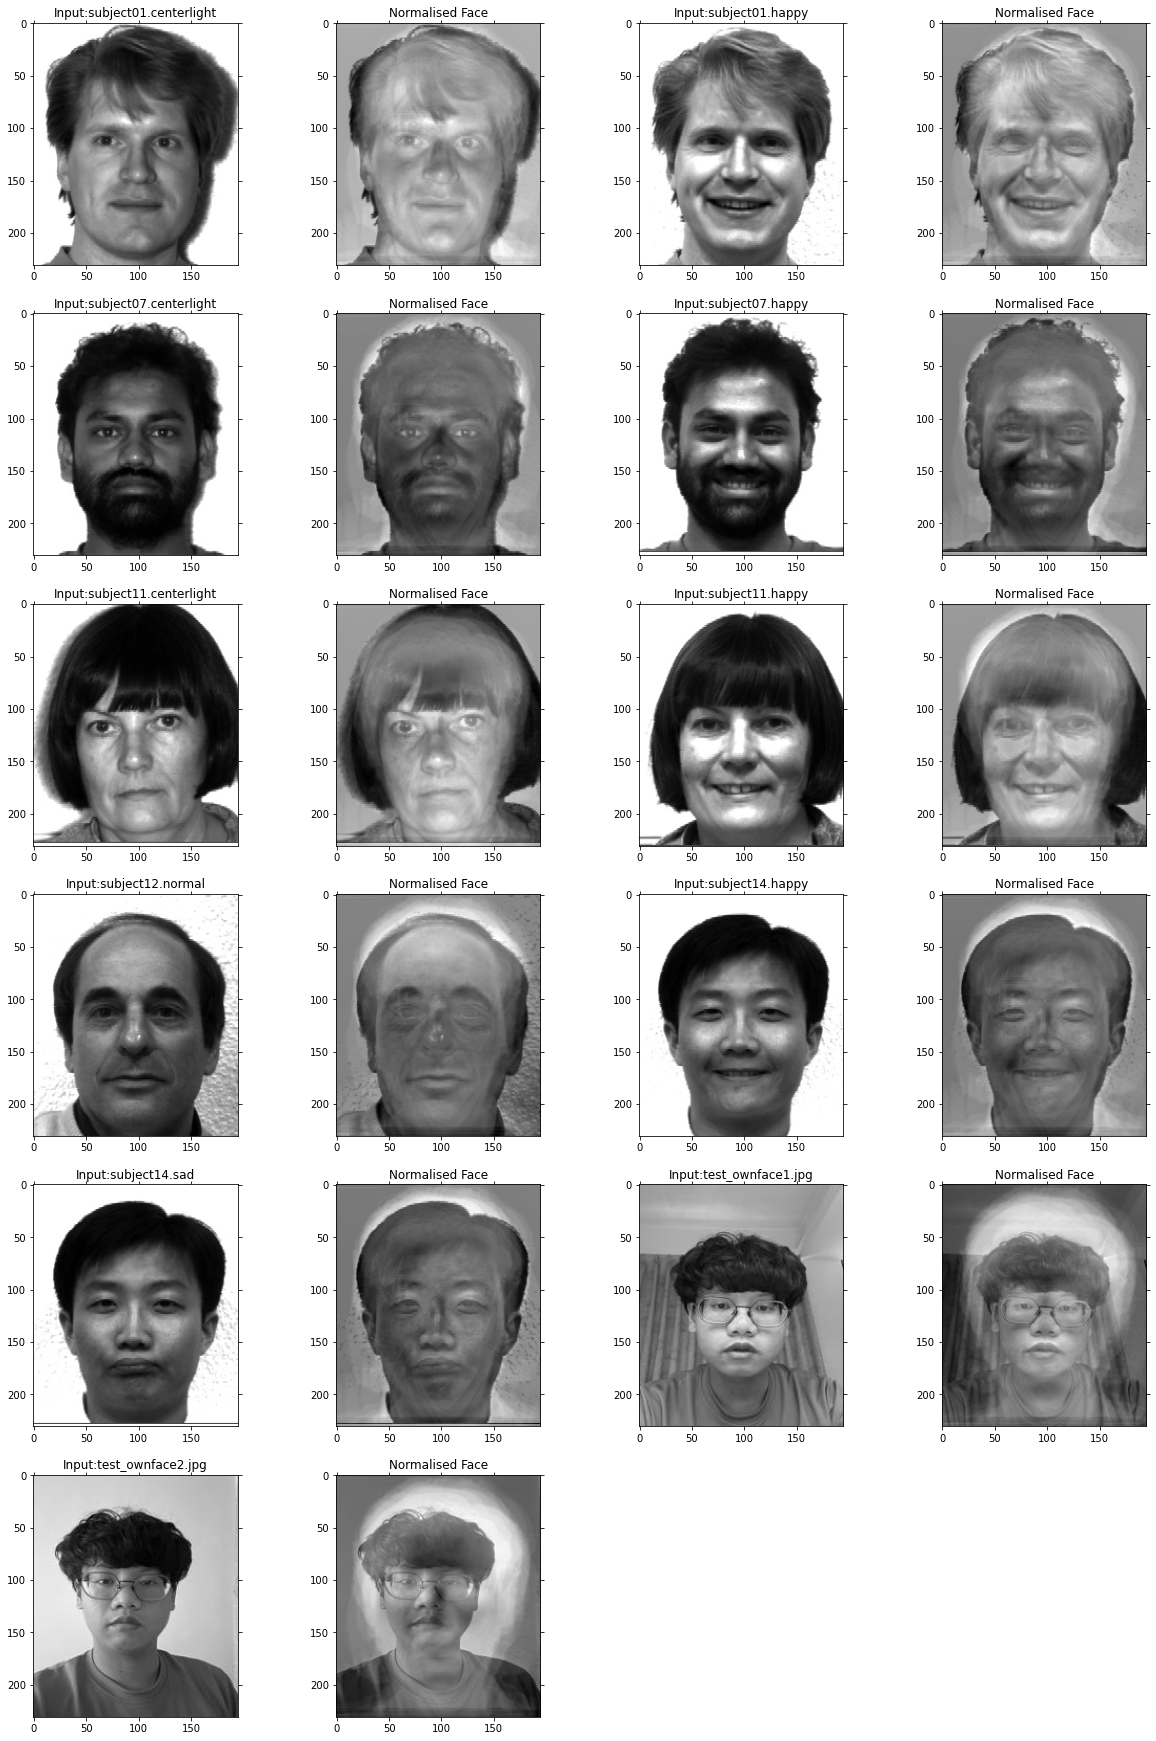

In [ ]:
count        = 0
def recogniser(img, train_image_names,proj_data,w):
    global count
    unknown_face        = plt.imread('Dataset/'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    plt.subplot(9,4,1+count)
    plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
    plt.title('Normalised Face')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()